# Chapter 4: Minimum spanning trees

In this chapter we will continue to study algorithms that process graphs. We will implement Kruskal's algorithm to construct the **minimum spanning tree** of a graph, a subgraph that efficiently connects all nodes.

## Trees in python

A tree is an undirected graph where any two edges are connected by **exactly one path**. For example, consider the tree below.

![A simple tree](Figures/example_tree.png)

We can represent in python using dictionaries, as we did in the last chapter.

In [ ]:
tree_dict = {'A' : set(['D']), 'B' : set(['D']), 'C' : set(['D']),
             'D' : set(['A', 'B', 'C', 'E']), 'E' : set(['D', 'F']), 'F' : set(['E'])}

Though in this chapter, we prefer to represent the tree as a list (set) of links:

In [ ]:
tree_links = [(node, neighbor) for node in tree_dict.keys() for neighbor in tree_dict[node]]
tree_links

If we choose one node as the **root** of the tree, we have exactly one path from this root to each of the other terminal nodes. This idea can applied recursively as follows: from this root, each neighboring is itself a root of a subtree. Each of these subtrees also consist of a root and possibly one or more subtrees. Hence we can also represent the tree as a nested sublist:

```
tree = [root, [subtree1], [subtree2],...]
```

For our example, we obtain when taking node D as a root: (see [here](http://interactivepython.org/courselib/static/pythonds/Trees/ListofListsRepresentation.html))

In [ ]:
tree_list = ['D', ['A'], ['B'], ['C'], ['E', ['F']]]

## Minimum spanning tree

Suppose we have an undirected connected weighted graph $G$ as depicted below.

![A weighted graph](Figures/graph.png)

Weighted graphs can either be implemented as a set of weighted edges of as a dictionary.

In [1]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

edges = set([(5, 'A', 'D'), (7, 'A', 'B'), (8, 'B', 'C'), (9, 'B', 'D'),
         (7, 'B', 'E'), (5, 'C', 'E'), (15, 'D', 'E'), (6, 'F', 'D'), 
        (8, 'F', 'E'), (9, 'E', 'G'), (11, 'F', 'G')])

In [2]:
weighted_adj_list = {v : set([]) for v in vertices}

for weight, vertex1, vertex2 in edges:
    weighted_adj_list[vertex1].add((weight, vertex2))
    weighted_adj_list[vertex2].add((weight, vertex1))  # undirected graph, in=outgoing edge

weighted_adj_list

{'A': {(5, 'D'), (7, 'B')},
 'B': {(7, 'A'), (7, 'E'), (8, 'C'), (9, 'D')},
 'C': {(5, 'E'), (8, 'B')},
 'D': {(5, 'A'), (6, 'F'), (9, 'B'), (15, 'E')},
 'E': {(5, 'C'), (7, 'B'), (8, 'F'), (9, 'G'), (15, 'D')},
 'F': {(6, 'D'), (8, 'E'), (11, 'G')},
 'G': {(9, 'E'), (11, 'F')}}

For example, the nodes may represent cities and the weight of an edge may represent the cost of implementing a communication line between two cities. If we want to make communication possible between all cities, these should be a path between any two cities. A **spanning tree** is a subgraph of $G$ that is a tree which contains all nodes of $G$. The cost of the spanning tree is simply the sum of a the weights of the edges in this tree. Often, multiple spanning trees can be chosen from a connected graph. The **minimum spanning tree** is simply the spanning tree with the lowest cost.

The figure below shows the minimum spanning tree for $G$ in green.

![A weighted graph](Figures/min_spanning_tree.png)

Minimum spanning trees have many applications:
- design of computer-, telecommunication-, transportation- and other networks
- hierachical clustering
- image segmentation and feature extraction
- phylogenetic analysis
- construction of mazes

## Disjoint-set data structure

Implementing an algorithm for finding the minimum spanning tree is fairly straightforward. The only bottleneck is that the algorithm requires the a **disjoint-set data structure** to keep track of a set partitioned in a number of disjoined subsets.

For example, consider the following inital set of eight elements.

![A set of eight elements](Figures/disjointset1.png)

We decide to group elements A, B and C together in a subset and F and G in another subset.

![The same set, but after grouping some elements together.](Figures/disjointset2.png)

The disjoint-set data structure support the following operations:
- **Find** check which subset an element is in. Is typically used to check whether two objects are in the same subset.
- **Union** to merge two subsets into a single subset.

A python implementation of a disjoint-set is available using an union-set forest. A simple example will make everything clear!

In [1]:
from union_set_forest import USF

animals = ['mouse', 'bat', 'robin', 'trout', 'seagull', 'hummingbird',
           'salmon', 'goldfish', 'hippopotamus', 'whale', 'sparrow']
union_set_forest = USF(animals)

# group mammals together
union_set_forest.union('mouse', 'bat')
union_set_forest.union('mouse', 'hippopotamus')
union_set_forest.union('whale', 'bat')

# group birds together
union_set_forest.union('robin', 'seagull')
union_set_forest.union('seagull', 'sparrow')
union_set_forest.union('seagull', 'hummingbird')
union_set_forest.union('robin', 'hummingbird')

# group fishes together
union_set_forest.union('goldfish', 'salmon')
union_set_forest.union('trout', 'salmon')

In [6]:
# mouse and whale in same subset?
print(union_set_forest.find('mouse') == union_set_forest.find('whale'))

True


In [3]:
# robin and salmon in the same subset?
print(union_set_forest.find('robin') == union_set_forest.find('salmon'))

False


## Kruskal's algorithm

Kruskal's algorithm is a very simple algorithm to find the minimum spanning tree. The main idea is to start with an intial 'forest' of the induvidual nodes of the graph. In each step of the algorithm we add an edge with the smallest possible value that connects two disjoints trees in the forest. This process is continued until we have a single tree, which is a minimum spanning tree, or until all edges are considered. In the former case the algoritm returns the minimum spanning forest. 

### Example run of Kruskal's algorithm

Consider the weighted graph again.

![A weighted graph](Figures/graph.png)

In a first step, the algorithm selects the edge with the lowest weight, here connecting nodes A and D. This edge has a weight of 5.

![The first edge with lowest weight is selected.](Figures/K1.png)



The next edge that is selected connects nodes C and E. This edge also has a weight of 5.

![The second edge is selected.](Figures/K2.png)

The edge between D and F is subsequently selected.

![A third edge is added to the forest.](Figures/K3.png)



In the current forest, the edge between B and D becomes inaccessible. Taking this edge would result in a cycle in our graph (B and D are already connected through A in our forest), so it is forbidden.

![Now edge BD becomes forbidden, because adding it to our forest would result in a cycle.](Figures/K4.png)


The next allowd edge with the lowest weight is between nodes B and E. Taking this edges connects two independent components in our forest and makes other edges forbidden.

![We add edge BD, connecting two components in our forest.](Figures/K5.png)


Finally, edge EG connects the last node G to our tree with the lowest cost.

![Adding edge EG results in the minimum spanning tree.](Figures/K6.png)

### Pseudocode of Kruskal's algorithm

```
function Kruskal(G):
1 A := empty list
2 for each node v in G
3    MAKE-SET(v)
4 for each edge (u, v) ordered by weight(u, v), increasing:
5    if FIND-SET(u) ≠ FIND-SET(v):
6       add (u, v) to A
7       UNION(u, v)
8 return A
```

### Time complexity of Kruskal's algorithm

We assume that by using a disjoint set data structure, ```FIND``` and ```UNION``` can be performed using a time complexity of $\mathcal{O}(1)$. Then the only cost is in sorting the edges by their weight, which can be done with a time complexity of $\mathcal{O}(|E| \log(|E|))$, which is the time complexity of generating the minimum spanning tree using this algorithm.

**Assignment 1: completing Kruskal's algorithm**

1. Complete the code for Kruskals algorithm below. Test the code on the example network given above.
2. Ticket to Ride is a fun boardgame in which you have to connect trains to several important cities in the United States. Load the vertices (cities) and edges (roads) from the file `ticket_to_ride.py`. Compute a minimum spanning tree.

![The map of Ticket to Ride.](Figures/TtRmap.jpg)

In [11]:
def kruskal(vertices, edges):
    """
    Kruskal's algorithm for finding a minimum spanning tree
    Input :
        - vertices : a set of the vertices of the graph
        - edges : a list of weighted edges (e.g. (0.7, 'A', 'B')) for an
                    edge from node A to node B with weigth 0.7
    Output:
        a minumum spanning tree represented as a list of edges
    """
    forest = []
    usf = USF([v for v in vertices])
    edges = sorted(edges)
    
    for edge in edges:
        if usf.find(edge[1]) != usf.find(edge[2]):
            forest.append(edge)
            usf.union(edge[1], edge[2])
        
    return forest

In [12]:
vertices = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [(5, 'A', 'D'), (7, 'A', 'B'), (8, 'B', 'C'), (9, 'B', 'D'),
         (7, 'B', 'E'), (5, 'C', 'E'), (15, 'D', 'E'), (6, 'F', 'D'), 
        (8, 'F', 'E'), (9, 'E', 'G'), (11, 'F', 'G')]

print(kruskal(vertices, edges))

[(5, 'A', 'D'), (5, 'C', 'E'), (6, 'F', 'D'), (7, 'A', 'B'), (7, 'B', 'E'), (9, 'E', 'G')]


In [55]:
from ticket_to_ride import vertices as cities
from ticket_to_ride import edges as roads

In [51]:
# for city in cities:
    # print(city)
roads
#roads.append((3, 'Santa Fe', 'Oklahoma City'))
[r for r in roads if r[1] == 'Denver' or r[2] == 'Denver']

[(4, 'Phoenix', 'Denver'),
 (4, 'Kansas City', 'Denver'),
 (3, 'Salt Lake City', 'Denver'),
 (4, 'Denver', 'Omaha'),
 (2, 'Santa Fe', 'Denver'),
 (4, 'Denver', 'Oklahoma City'),
 (4, 'Omaha', 'Denver'),
 (4, 'Denver', 'Helena'),
 (4, 'Oklahoma City', 'Denver'),
 (4, 'Helena', 'Denver'),
 (2, 'Denver', 'Santa Fe'),
 (4, 'Denver', 'Phoenix'),
 (3, 'Denver', 'Salt Lake City'),
 (4, 'Denver', 'Kansas City')]

In [54]:
# compute here the MST for Ticket to Ride
k = kruskal(cities, roads)
for i in k:
    print("{0:>15} --- ({1}) --> {2}".format(str(i[1]), i[0], i[2]))
print("Total cost: ", sum([r[0] for r in k]))

        Atlanta --- (1) --> Nashville
     Charleston --- (1) --> Raleigh
         Dallas --- (1) --> Houston
    Kansas City --- (1) --> Omaha
       Portland --- (1) --> Seattle
        Seattle --- (1) --> Vancouver
        Atlanta --- (2) --> Charleston
         Boston --- (2) --> Montreal
         Boston --- (2) --> New York
        Chicago --- (2) --> Saint Louis
         Dallas --- (2) --> Little Rock
         Dallas --- (2) --> Oklahoma City
         Denver --- (2) --> Santa Fe
         Duluth --- (2) --> Omaha
        El Paso --- (2) --> Santa Fe
        Houston --- (2) --> New Orleans
    Kansas City --- (2) --> Oklahoma City
    Kansas City --- (2) --> Saint Louis
      Las Vegas --- (2) --> Los Angeles
    Los Angeles --- (2) --> Phoenix
      Nashville --- (2) --> Saint Louis
       New York --- (2) --> Pittsburgh
       New York --- (2) --> Washington DC
        Raleigh --- (2) --> Washington DC
Sault St. Marie --- (2) --> Toronto
        Calgary --- (3) --> Vancouver
    

## The travelling salesman problem

The traveling salesman problem is a well-known problem in computer science. The goal is to find a tour in a graph with a minimal cost. This problem is NP-hard, there is no algorithm to solve this efficiently for large graphs.

The tour is represented as a dictionary, for each key-value pair a vertex and the associated next vertex in the tour.

Below are two heuristic algorithms to find a good tour.

### Nearest Neighbour

The simplest algorithm, can be done in with a time complexity of $\mathcal{O}(|V|^2)$.

1. Select a random vertex.
2. Find the nearest univisited vertex and add it to the path.
3. Are there any unvisited vertices left? If yes, repeat step 2.
4. Return to the first vertex.

### Greedy

A greedy algorithm that gives a solution in $\mathcal{O}(|V|^2\log(|V|))$ time.

1. Sort all edges
2. Select the shortest edge and add it to the tour if it does not:
    - creates a tour with less than $|V|$ vertices 
    - increases the degree of any of the vertices in the tour to more than two.
3. Repeat step 2 until the tour has $|V|$ vertices.

**Assignment 2**

1. Complete the functions `nearest_neighbour_tsa` and `greedy_tsa`. 
2. We have two benchmarks problems, one with 29 and one with 225 cities. For each problem the graph and coordinates of the cities are given. Give the **found optimal cost** and **running time** for the two algorithms.
3. Make a plot of the best tour for each of the two benchmarks.
4. Discuss how you can see on such a plot if the tour is optimal.

### Implementation

In [107]:
def nearest_neighbour_tsa(graph, start, as_dict=False):
    """
    Nearest Neighbour heuristic for the travelling salesman problem
    
    Inputs:
        - graph: the graph as an adjacency list
        - start: the vertex to start
        
    Outputs:
        - tour: the tour as a dictionary
        - tour_cost: the cost of the tour
    
    """
    tour = []
    tour_dict = {}
    tour_cost = 0
    v = start
    
    while len(tour_dict) < len(graph):
        edges = sorted(graph[v])
        
        for e in edges:
            if e[1] not in tour_dict.keys() or (e[1] == start and len(tour_dict) == len(graph)-1):
                tour_dict[v] = e[1]
                tour.append((e[0], e[1], v))
                v = e[1]
                tour_cost += e[0]
                break
    
    if as_dict:
        return tour_dict, tour_cost
    
    else:
        return tour, tour_cost

In [89]:
def creates_tour(usf, v1, v2):
    return(usf.find(v1) == usf.find(v2))


def degrees_smaller_than_two(v1, v2, degree_dict):
    return(degree_dict[v1] < 2 and degree_dict[v2] < 2)


def greedy_tsa(graph):
    """
    Greedy heuristic for the travelling salesman problem
    
    Inputs:
        - graph: the graph as an adjacency list
        
    Outputs:
        - tour: the tour as a dictionary
        - tour_cost: the cost of the tour
    
    """
    tour = []
    
    # sort all edges
    all_edges = []
    for x in graph:
        for j in list(graph[x]):
            all_edges += [(j[0], j[1], x)]
    all_edges = sorted(all_edges)

    usf = USF([v for v in graph])
    degree_dict = {v: 0 for v in graph}
    
    for i in range(len(all_edges)):
        edge = all_edges[i]

        if (not creates_tour(usf, edge[1], edge[2])) and \
        degrees_smaller_than_two(edge[1], edge[2], degree_dict):
            tour.append(edge)
            degree_dict[edge[1]] += 1
            degree_dict[edge[2]] += 1
            usf.union(edge[1], edge[2])

        if len(tour) == len(graph)-1 and \
        degrees_smaller_than_two(edge[1], edge[2], degree_dict):
            tour.append(edge)
    
    return tour, sum([x[0] for x in tour])

In [32]:
# load coordinates and graph for the two benchmark algorithms
from load_tsa import coordinates29, coordinates225, graph29, graph225

#### Test:  nearest neighbor

In [101]:
for graph in [graph29, graph225]:
    best_start = 0
    best_cost = nearest_neighbour_tsa(graph, 0, as_dict=True)[1]
    for i in range(1, len(graph)):
        tour, tour_cost = nearest_neighbour_tsa(graph, i, as_dict=True)
        if tour_cost < best_cost:
            best_cost = tour_cost
            best_start = i

    print("Nearest Neighbor on graph{0}: starting vertex = {1} (optimal)\n".format(len(graph), best_start))
    tour, tour_cost = nearest_neighbour_tsa(graph, best_start, as_dict=True)
    % timeit nearest_neighbour_tsa(graph, best_start, as_dict=True)
    curr = best_start
    i= 0 
    while i < len(tour)-1:
        print("{0} -->".format(curr), end=" ")
        i += 1 
        curr = tour[curr]
    print("\n\nTotal cost: ", tour_cost)
    print("-"*100)

Nearest Neighbor on graph29: starting vertex = 22 (optimal)

1000 loops, best of 3: 296 µs per loop
22 --> 26 --> 23 --> 7 --> 0 --> 27 --> 5 --> 11 --> 8 --> 4 --> 25 --> 28 --> 2 --> 1 --> 20 --> 19 --> 9 --> 3 --> 14 --> 17 --> 13 --> 21 --> 16 --> 10 --> 18 --> 15 --> 12 --> 24 --> 

Total cost:  2134.0
----------------------------------------------------------------------------------------------------
Nearest Neighbor on graph225: starting vertex = 116 (optimal)

10 loops, best of 3: 27.3 ms per loop
116 --> 186 --> 117 --> 118 --> 185 --> 184 --> 119 --> 174 --> 120 --> 121 --> 122 --> 123 --> 124 --> 125 --> 126 --> 127 --> 128 --> 221 --> 129 --> 210 --> 130 --> 85 --> 84 --> 83 --> 82 --> 81 --> 220 --> 93 --> 92 --> 208 --> 94 --> 79 --> 80 --> 78 --> 77 --> 76 --> 216 --> 218 --> 215 --> 30 --> 205 --> 201 --> 29 --> 28 --> 27 --> 203 --> 25 --> 24 --> 207 --> 23 --> 22 --> 12 --> 13 --> 14 --> 15 --> 16 --> 19 --> 202 --> 18 --> 17 --> 10 --> 11 --> 36 --> 35 --> 33 --> 32 

#### Test: greedy

In [53]:
for graph in [graph29, graph225]:
    print("Greedy on graph{}\n".format(len(graph)))
    %timeit greedy_tsa(graph)
    tour, cost = greedy_tsa(graph)
    print("Total cost: ", cost)
    print("-"*100)

Greedy on graph29

100 loops, best of 3: 2.76 ms per loop
Total cost:  2480.0
----------------------------------------------------------------------------------------------------
Greedy on graph225

1 loop, best of 3: 194 ms per loop
Total cost:  4626.131929
----------------------------------------------------------------------------------------------------


### Plotting the paths and determining running time

In [12]:
import matplotlib.pyplot as plt


def plot_arrow(a, b, cost='', **kwargs):
    ax.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], **kwargs,
              head_width=3, length_includes_head=True, label=cost, )
    
    
def tsp(coordinates, graph, method='greedy', start=0):
    if method == 'greedy':
        tour, cost = greedy_tsa(graph)
        
    elif method == 'nearest neighbors':
        tour, cost = nearest_neighbour_tsa(graph, start)
        
    ax.scatter(*zip(*coordinates))
    
    for v1 in graph:
        for v2 in graph[v1]:
            plot_arrow(coordinates[v1], coordinates[v2[1]], color='y', alpha=0.2)
            
    for edge in tour:
        plot_arrow(coordinates[edge[1]], coordinates[edge[2]], edge[0], color='r', alpha=0.7)
        
    ax.set_title("Graph with {0} vertices, TSP with {1}, cost: {2}".format(len(graph), method, cost))
    return


Running time:
graph29  - Nearest neighbors - 1000 loops, best of 3: 307 µs per loop

         - Greedy - 100 loops, best of 3: 2.76 ms per loop
----------------------------------------------------------------------------------------------------
graph225 - Nearest neighbors - 10 loops, best of 3: 27.5 ms per loop

         - Greedy - 1 loop, best of 3: 198 ms per loop
Plots:


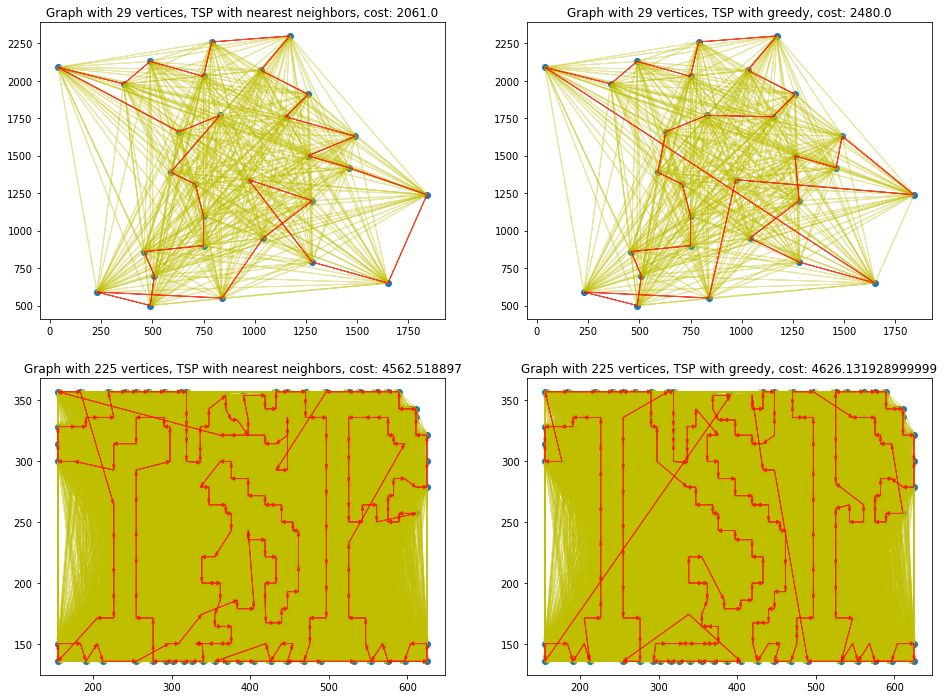

In [84]:
fig = plt.figure(figsize=(16,12))

print("Running time:")
print("="*100)
print("graph29  - Nearest neighbors", end=" - ")
ax = fig.add_subplot(221)
t = %timeit -o nearest_neighbour_tsa(graph29, 22)
tsp(coordinates29, graph29, method="nearest neighbors", start=22)

print("\n         - Greedy", end=" - ")
ax = fig.add_subplot(222)
t = %timeit -o greedy_tsa(graph29)
tsp(coordinates29, graph29, method="greedy")

print("-"*100)
print("graph225 - Nearest neighbors", end=" - ")
ax = fig.add_subplot(223)
t = %timeit -o nearest_neighbour_tsa(graph225, 116)
tsp(coordinates225, graph225, method="nearest neighbors", start=116)

print("\n         - Greedy", end=" - ")
ax = fig.add_subplot(224)
t = %timeit -o greedy_tsa(graph225)
tsp(coordinates225, graph225, method="greedy")

print("Plots:")
print("="*100)
plt.show()

Concerning the running time, it is clear that the greedy algorithm has a considerable longer running time compared to the nearest neighbor algorithm, while providing not necessarily better solutions.

Since the weights on the edges in these graphs correspond to distances between the vertices in two-dimensional cartesian axis system, an optimal tour is expected to contain few long edges. The plots clearly indicate that both implemented heuristics do not necessarily provide an optimal solution. On the graph with 29 vertices, the greedy algorithm includes a very long edge from the lower right vertex to vertex 1 (upper left), whereas the nearest neighbor algorithm does not include this problematic edge, leading to a considerably lower total cost. The two algorithms perform comparably for the graph with 225 vertices. Again the greedy algorithm seems to include disproportionally long edges, whereas the nearest neighbor algorithm includes several moderately long edges instead). Note that in the case of the greedy TSP algorithm, other solutions might be obtained when equally weighted edges are differently sorted.